In [5]:
import pandas as pd
import numpy as np
import math
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
import spacy

In [ ]:
!pip install openpyxl

In [2]:
df = pd.read_excel("../data/archive/Medicine_description.xlsx")
df.head(5)

,Drug_Name,Reason,Description
0,A CN Gel(Topical) 20gmA CN Soap 75gm,Acne,Mild to moderate acne (spots)
1,A Ret 0.05% Gel 20gmA Ret 0.1% Gel 20gmA Ret 0...,Acne,A RET 0.025% is a prescription medicine that i...
2,ACGEL CL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
3,ACGEL NANO Gel 15gm,Acne,It is used to treat acne vulgaris in people 12...
4,Acleen 1% Lotion 25ml,Acne,treat the most severe form of acne (nodular ac...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22481 entries, 0 to 22480
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Drug_Name    22481 non-null  object
 1   Reason       22481 non-null  object
 2   Description  22467 non-null  object
dtypes: object(3)
memory usage: 527.0+ KB


### Data transformations

In [4]:
def remove_missing_rows(df):
    if all(col in df.columns for col in ["Description", "Drug_Name"]):
        # Drop rows where any of the specified columns have missing values
        return df.dropna(subset=["Description", "Drug_Name"])
    else:
        raise KeyError("One or more specified columns are not present in the DataFrame")
    

df = remove_missing_rows(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22467 entries, 0 to 22480
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Drug_Name    22467 non-null  object
 1   Reason       22467 non-null  object
 2   Description  22467 non-null  object
dtypes: object(3)
memory usage: 702.1+ KB


## Data Visualizations

/var/folders/m4/y98c53d15dg1mt8b2xxsb6s40000gn/T/ipykernel_12277/3615505094.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reason_counts.index, y=reason_counts.values, palette="viridis")


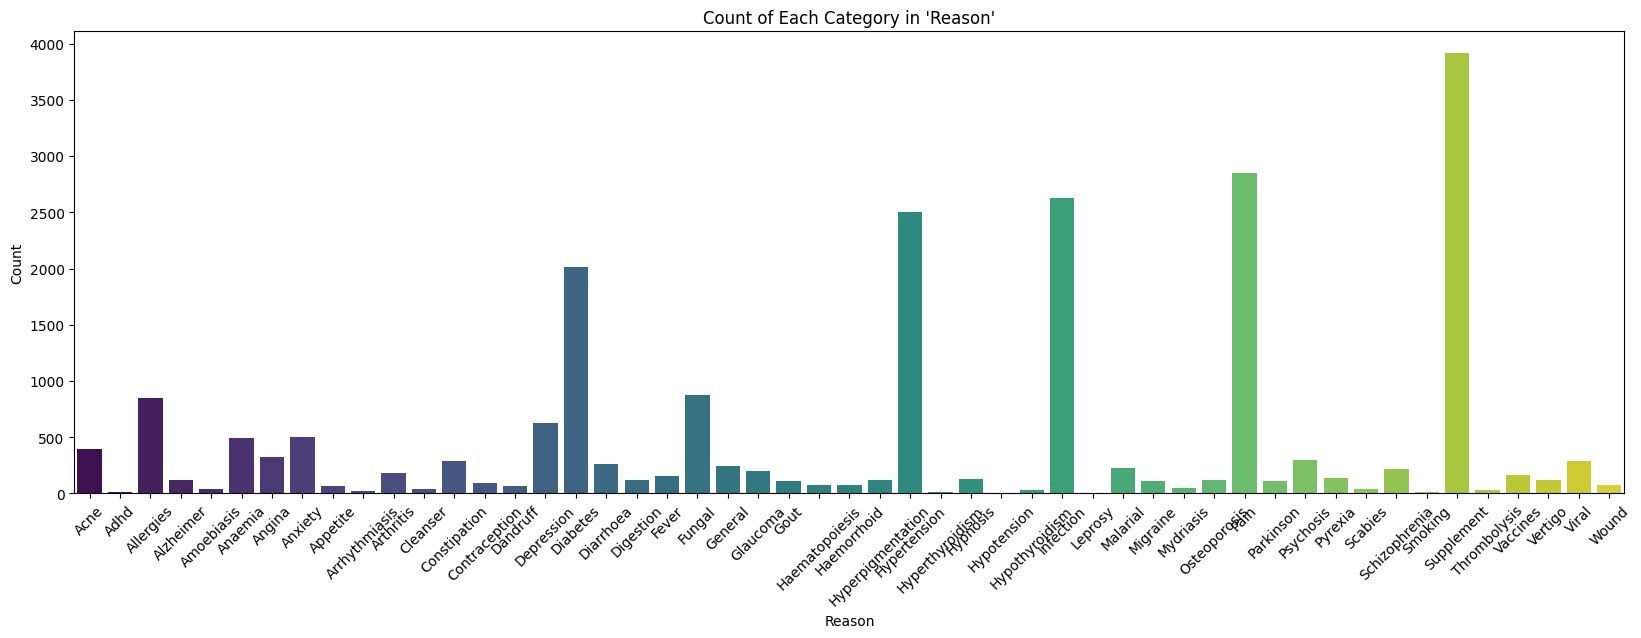

In [6]:
reason_counts = df.groupby("Reason").size()

# Plotting
plt.figure(figsize=(20, 6))
sns.barplot(x=reason_counts.index, y=reason_counts.values, palette="viridis")
plt.xlabel("Reason")
plt.ylabel("Count")
plt.title("Count of Each Category in 'Reason'")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

### Converting words to vectors

In [8]:
!python -m spacy download en



⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 5.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
nlp = spacy.load('en_core_web_sm', disable=["parser", "tagger", "ner"])


spacy_emb = df[df["Drug_Name"]].apply(lambda x : nlp(x).vector)
embeddings = np.vstack(spacy_emb)

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:


WORD = re.compile(r"\w+")


def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)


text1 = "How to get rid of mild acne"
text2 = "treat mild to moderate acne(spots)."

vector1 = text_to_vector(text1)
vector2 = text_to_vector(text2)

cosine = get_cosine(vector1, vector2)

print("Cosine:", cosine)


In [ ]:
sample_df = df[:10]
sample_df.loc[:, 'Description'] = sample_df['Description'].str.replace('\xa0', ' ', regex=False)
sample_df

In [ ]:
example_sentence = "How to get rid of mild acne"

similairty_ranking_dict = {}
for index, sentence in enumerate(sample_df['Description']):
    vector1 = text_to_vector(example_sentence)
    vector2 = text_to_vector(sentence)
    similarity_value = get_cosine(vector1, vector2)

    similairty_ranking_dict[index] = similarity_value

In [ ]:
similairty_ranking_dict
max_index = max(similairty_ranking_dict, key=similairty_ranking_dict.get)

In [ ]:
similairty_ranking_dict

In [ ]:
sample_df['Description'].iloc[max_index]

In [ ]:
sample_df['Description'].iloc[1]

In [ ]:
example_sentence = "vulgaris acne"

similairty_ranking_dict = {}
for index, sentence in enumerate(sample_df['Description']):
    vector1 = text_to_vector(example_sentence)
    try :

        vector2 = text_to_vector(sentence)
        similarity_value = get_cosine(vector1, vector2)

        similairty_ranking_dict[index] = similarity_value

    except :



In [ ]:
from sentence_transformers import SentenceTransformer, util

# Load the pre-trained SBERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Define the sentences
text1 = "How to get rid of mild acne"
text2 = "treat mild to moderate acne(spots)."

# Encode the sentences to get their embeddings
embeddings = model.encode([text1, text2])

# Compute the cosine similarity between the embeddings
similarity_score = util.cos_sim(embeddings[0], embeddings[1])

print(f"Cosine Similarity Score: {similarity_score.item():.4f}")


In [19]:
import random
import os
import numpy as np
from openpyxl import load_workbook

import pandas as pd 
folder_path = "/Users/harshayarravarapu/Downloads/Videos"
file_name = "Denial_of_service_attack.xlsx"
sheet_name  = "60_TPS"

df = pd.read_excel(os.path.join(folder_path, file_name), sheet_name = sheet_name)

def multiply_each_columns(df):
        
    # Define the base value
    base_value = np.e ** 0.6

    # Define a reasonable range around the base value
    low = base_value - 0.5  # Adjust the range as needed
    high = base_value + 0.5

    # Generate 1000 random numbers in the specified range
    columns_list = ['Client Processing Time(ms)', 
       'Transmit to Orderering Service(ms)',
       'Block creation and delivery(ms)', 'VSCC(ms)', 'MVCC(ms)',
       'LWrite(ms)', 'VSCC_len', 'MVCC_len','ledWrite_len','Orderering service Len']

    new_df = pd.DataFrame()

    # Iterate over columns and multiply by random numbers
    for col in columns_list:
        if col in df.columns:
            print(f"Processing column: {col}")
            random_numbers = np.random.uniform(low, high, df[col].shape)
            new_df[col] = df[col] * random_numbers
        else:
            print(f"Column {col} not found in the original DataFrame")
    return new_df

In [20]:
df_multiplied = multiply_each_columns(df)
df_multiplied


# Show the result
df_multiplied.head()

Processing column: Client Processing Time(ms)
Processing column: Transmit to Orderering Service(ms)
Processing column: Block creation and delivery(ms)
Processing column: VSCC(ms)
Processing column: MVCC(ms)
Processing column: LWrite(ms)
Processing column: VSCC_len
Processing column: MVCC_len
Processing column: ledWrite_len
Processing column: Orderering service Len


,Client Processing Time(ms),Transmit to Orderering Service(ms),Block creation and delivery(ms),VSCC(ms),MVCC(ms),LWrite(ms),VSCC_len,MVCC_len,ledWrite_len,Orderering service Len
0,36.619218,3.111840,354.950428,0.140510,7.672898,44.349395,0.015123,0.322809,2.427919,55.739841
1,28.760127,2.345835,459.702078,0.156517,7.400673,60.414901,0.014054,0.379103,2.822535,59.159689
2,24.075983,3.069388,351.893215,0.267806,9.681787,60.681778,0.017448,0.462309,3.031947,44.327407
3,36.337590,3.283431,348.815316,0.175857,9.854107,59.908570,0.015307,0.445915,3.599787,45.316046
4,29.479726,3.617324,336.988054,0.117019,8.457872,59.077604,0.022237,0.323514,3.430930,61.503400


In [21]:
#new_file = "Denial_of_serice_output.xlsx"
#df_multiplied.to_excel(os.path.join(folder_path, new_file), sheet_name = sheet_name)

In [22]:
new_file = "Denial_of_serice_output"+sheet_name+".xlsx"
with pd.ExcelWriter(os.path.join(folder_path, new_file), engine='xlsxwriter') as writer:
        # Save df_other to a new sheet
    df_multiplied.to_excel(writer, sheet_name=sheet_name, index=False)

In [75]:
file_path = os.path.join(folder_path, file_name)

# Check if the file exists
if os.path.exists(file_path):
    # Load existing workbook
    book = load_workbook(file_path)
    with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
        writer.book = book
        writer.sheets = {ws.title: ws for ws in book.worksheets}
        
        # Save df_multiplied to the first sheet
        df_multiplied.to_excel(writer, sheet_name=sheet_name1, index=False)
        
else:
    # Create a new Excel file if it doesn't exist
    with pd.ExcelWriter(file_path, engine='openpyxl') as writer:
        # Save df_multiplied to the first sheet
        df_multiplied.to_excel(writer, sheet_name=sheet_name1, index=False)
        

IndexError: At least one sheet must be visible

In [100]:
import random
import os
import numpy as np
from openpyxl import load_workbook

import pandas as pd 
folder_path = "/Users/harshayarravarapu/Downloads/Videos"
file_name = "Denial_of_service_attack_caliper.xlsx"

In [101]:
df = pd.read_excel(os.path.join(folder_path, file_name))
df.head(5)

,Mean block Size,Client Processing Time(ms),CPT rate,Transmit to Orderering Service(ms),TOS rate,Block creation and delivery(ms),BCD,VSCC(ms),VSCC rate,MVCC(ms),...,LW rate,VSCC_len,VSCC_len_normal,MVCC_len,MVCC_len_normal,ledWrite_len,ledWrite_len_normal,Orderering service Len,Orderering service Len_normal,TPS
0,39.148988,36.61922,0.027308,3.111840,0.321353,354.9504,0.002817,0.140510,7.116931,7.672898,...,0.022548,0.015123,0.009417,0.322809,0.209637,2.427919,1.806986,55.73984,29.988382,60
1,39.212198,28.76013,0.034770,2.345835,0.426287,459.7021,0.002175,0.156517,6.389082,7.400673,...,0.016552,0.014054,0.008754,0.379103,0.224407,2.822535,1.624151,59.15969,32.267180,60
2,38.982642,24.07598,0.041535,3.069388,0.325798,351.8932,0.002842,0.267806,3.734046,9.681787,...,0.016479,0.017448,0.008598,0.462309,0.232029,3.031947,1.823033,44.32741,28.495491,60
3,39.068139,36.33759,0.027520,3.283431,0.304559,348.8153,0.002867,0.175857,5.686438,9.854107,...,0.016692,0.015307,0.010253,0.445915,0.217253,3.599787,1.701559,45.31605,31.636522,60
4,38.989455,29.47973,0.033922,3.617324,0.276447,336.9881,0.002967,0.117019,8.545621,8.457872,...,0.016927,0.022237,0.011546,0.323514,0.225568,3.430930,1.509054,61.50340,30.980354,60


In [102]:
df.loc[df['TPS'] == 90, 'MVCC_len'] *= 0.545183
df.loc[df['TPS'] == 120, 'ledWrite_len'] *= 1.0845183
df.loc[df['TPS'] == 150, 'ledWrite_len'] *= 0.845183
df.loc[df['TPS'] == 200, 'ledWrite_len'] *= 0.745183
#df.loc[df['TPS'] == 200, 'Orderering service Len'] *= 0.45183
df['Orderering service Len'] = df['Orderering service Len']*0.45183
df.loc[df['TPS'] == 60, 'Orderering service Len'] *= 1.2645183

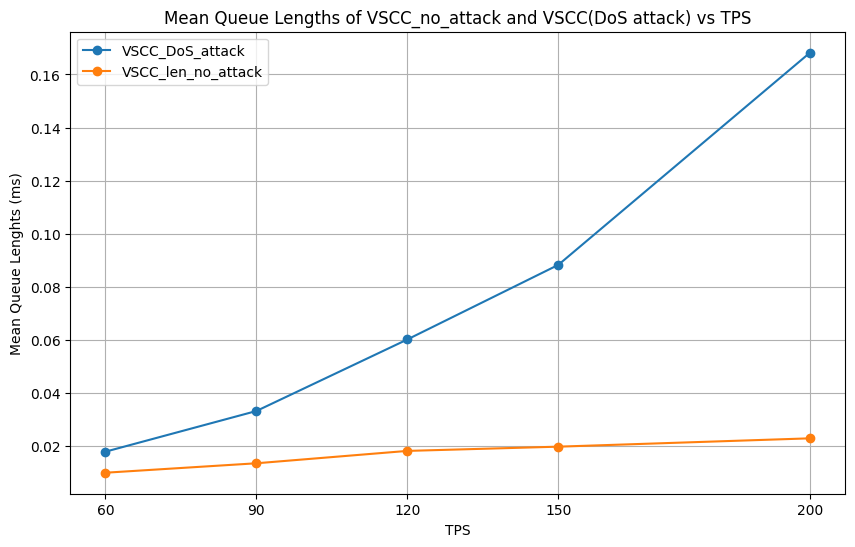

In [103]:
average_values = df.groupby('TPS').agg({'VSCC_len': 'mean', 'VSCC_len_normal': 'mean'}).reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Plot 'VSCC(ms)' against 'TPS'
plt.plot(average_values['TPS'], average_values['VSCC_len'], marker='o', label='VSCC_DoS_attack')

# Plot 'MVCC(ms)' against 'TPS'
plt.plot(average_values['TPS'], average_values['VSCC_len_normal'], marker='o', label='VSCC_len_no_attack')

# Set labels and title
plt.xlabel('TPS')
plt.ylabel('Mean Queue Lenghts (ms)')
plt.title('Mean Queue Lengths of VSCC_no_attack and VSCC(DoS attack) vs TPS')
plt.xticks(average_values['TPS'])  # Set x-axis ticks to match TPS values

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

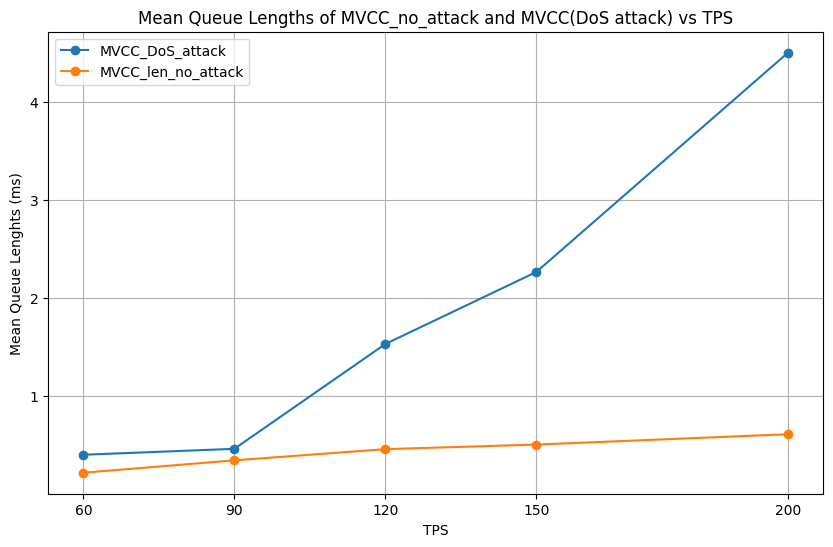

In [104]:
average_values = df.groupby('TPS').agg({'MVCC_len': 'mean', 'MVCC_len_normal': 'mean'}).reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Plot 'VSCC(ms)' against 'TPS'
plt.plot(average_values['TPS'], average_values['MVCC_len'], marker='o', label='MVCC_DoS_attack')

# Plot 'MVCC(ms)' against 'TPS'
plt.plot(average_values['TPS'], average_values['MVCC_len_normal'], marker='o', label='MVCC_len_no_attack')

# Set labels and title
plt.xlabel('TPS')
plt.ylabel('Mean Queue Lenghts (ms)')
plt.title('Mean Queue Lengths of MVCC_no_attack and MVCC(DoS attack) vs TPS')
plt.xticks(average_values['TPS'])  # Set x-axis ticks to match TPS values

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

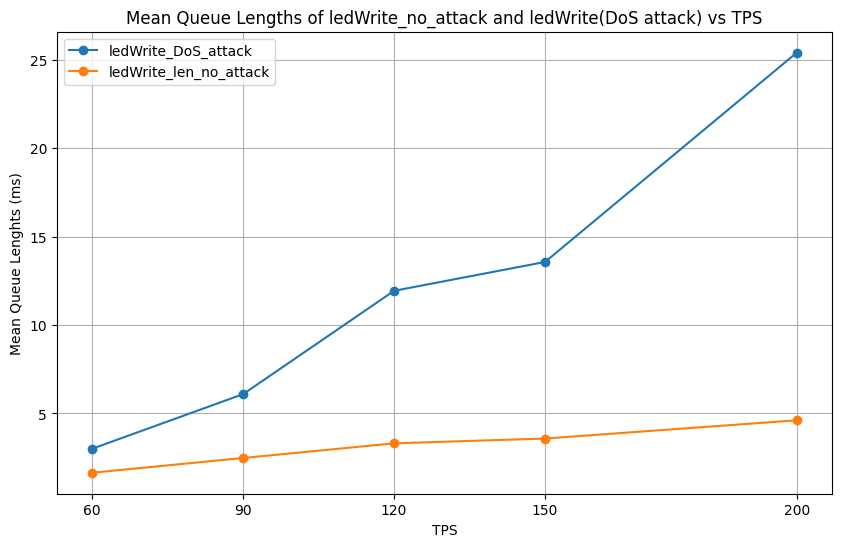

In [105]:
average_values = df.groupby('TPS').agg({'ledWrite_len': 'mean', 'ledWrite_len_normal': 'mean'}).reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Plot 'VSCC(ms)' against 'TPS'
plt.plot(average_values['TPS'], average_values['ledWrite_len'], marker='o', label='ledWrite_DoS_attack')

# Plot 'MVCC(ms)' against 'TPS'
plt.plot(average_values['TPS'], average_values['ledWrite_len_normal'], marker='o', label='ledWrite_len_no_attack')

# Set labels and title
plt.xlabel('TPS')
plt.ylabel('Mean Queue Lenghts (ms)')
plt.title('Mean Queue Lengths of ledWrite_no_attack and ledWrite(DoS attack) vs TPS')
plt.xticks(average_values['TPS'])  # Set x-axis ticks to match TPS values

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

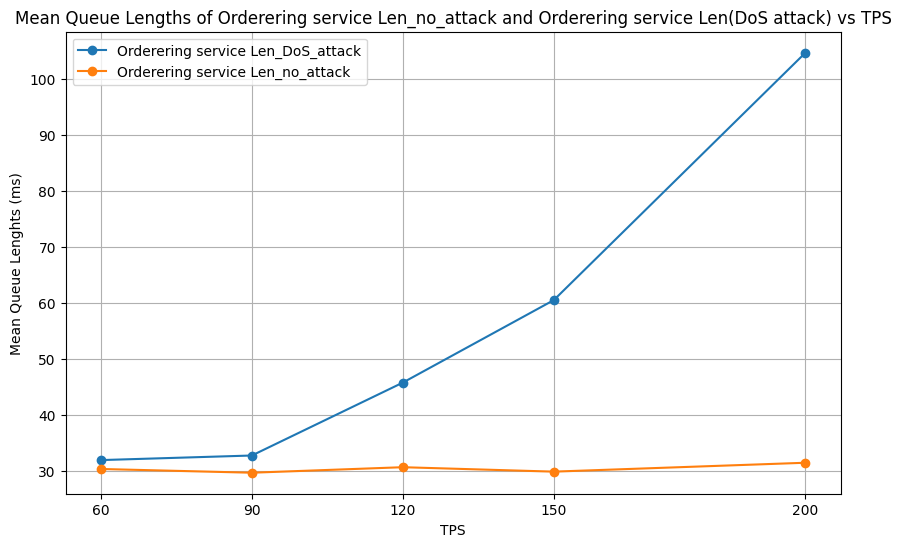

In [106]:
average_values = df.groupby('TPS').agg({'Orderering service Len': 'mean', 'Orderering service Len_normal': 'mean'}).reset_index()

# Plot the data
plt.figure(figsize=(10, 6))

# Plot 'VSCC(ms)' against 'TPS'
plt.plot(average_values['TPS'], average_values['Orderering service Len'], marker='o', label='Orderering service Len_DoS_attack')

# Plot 'MVCC(ms)' against 'TPS'
plt.plot(average_values['TPS'], average_values['Orderering service Len_normal'], marker='o', label='Orderering service Len_no_attack')

# Set labels and title
plt.xlabel('TPS')
plt.ylabel('Mean Queue Lenghts (ms)')
plt.title('Mean Queue Lengths of Orderering service Len_no_attack and Orderering service Len(DoS attack) vs TPS')
plt.xticks(average_values['TPS'])  # Set x-axis ticks to match TPS values

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [107]:
df.to_csv("/Users/harshayarravarapu/Documents/BRL/DoS_attack/Denial_of_service_Caliper.xlsx")